In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn.metrics.pairwise import pairwise_distances_argmin


In [5]:
df = pd.read_csv('./RGB.csv')
# df = pd.DataFrame({
#     'R': [42, 34, 30, 35, 35],
#     'G': [98, 87, 76, 82, 88],
#     'B': [192, 179, 163, 172, 181]
# })
df.head()

,R,G,B
0,42,98,192
1,34,87,179
2,30,76,163
3,35,82,172
4,35,88,181


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       9 non-null      int64
 1   G       9 non-null      int64
 2   B       9 non-null      int64
dtypes: int64(3)
memory usage: 344.0 bytes


9


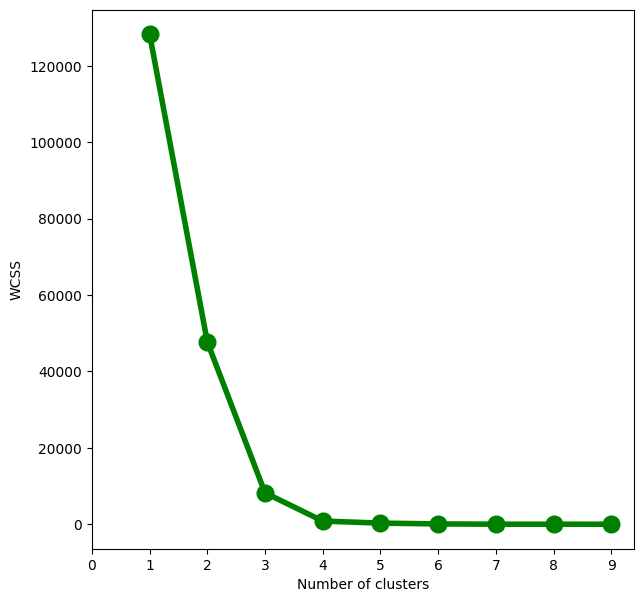

In [7]:
x = df.values
print(x.shape[0])

WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,10), WCSS, linewidth = 4, markersize = 12, marker = 'o', color = 'green')
plt.xticks(np.arange(10))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
def RGB_distances(x, y):
    dis = np.zeros((x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
            for j in range(x.shape[0]):
                R_avg = (x[i,0]-y[j,0])/2
                if(R_avg < 128): 
                    dis[i,j] = np.sqrt(2*np.power(x[i,0]-y[j,0],2) + 4*np.power(x[i,1]-y[j,1],2) + 3*np.power(x[i,2]-y[j,2],2))
                else:
                    dis[i,j] = np.sqrt(3*np.power(x[i,0]-y[j,0],2) + 4*np.power(x[i,1]-y[j,1],2) + 2*np.power(x[i,2]-y[j,2],2))
    return dis

In [9]:
RGB_distances(x,x)
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 5, random_state = 10, copy_x = False, algorithm = RGB_distances)
y_clusters = model.fit_predict(x)

InvalidParameterError: The 'algorithm' parameter of KMeans must be a str among {'lloyd', 'auto' (deprecated), 'full' (deprecated), 'elkan'}. Got <function RGB_distances at 0x7fc84107cee0> instead.

[0 0 0 0 0 0 2 1 0]


<Axes: ylabel='count'>

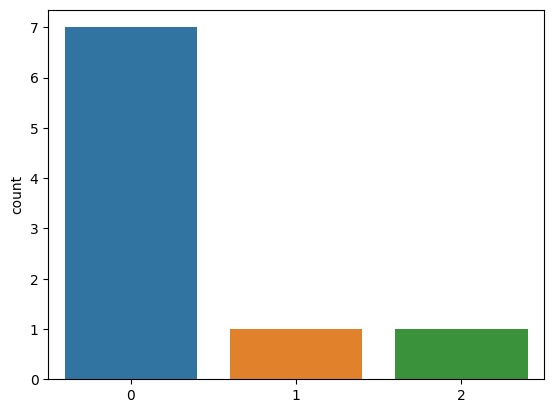

In [ ]:
print(y_clusters)
sns.countplot(x=y_clusters)

In [ ]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])

34
87


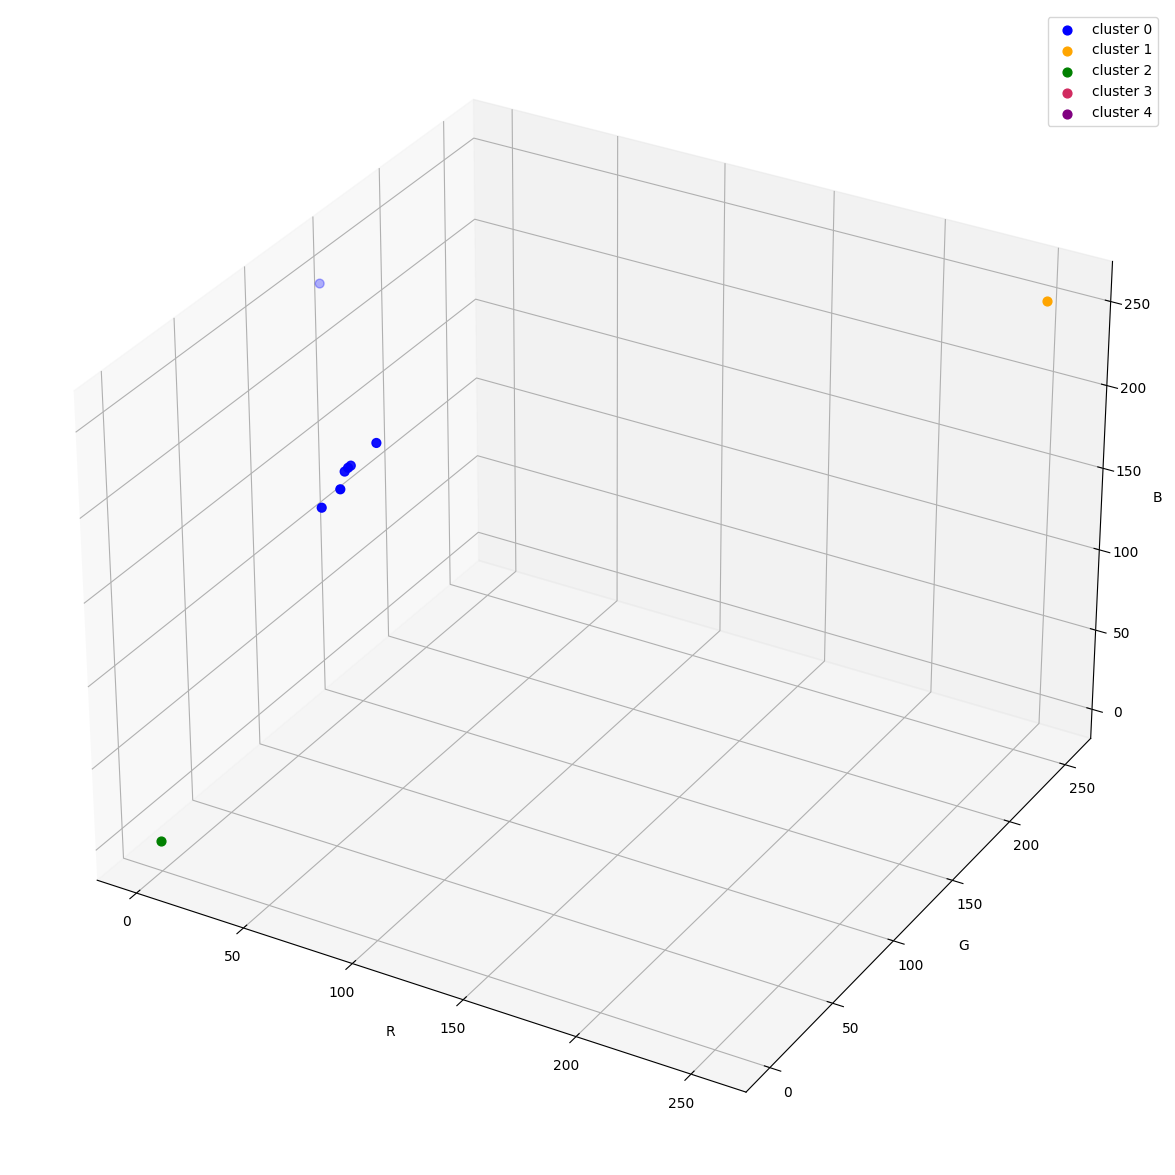

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0], x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40, color = 'blue', label = 'cluster 0')
ax.scatter(x[y_clusters == 1,0], x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40, color = 'orange', label = 'cluster 1')
ax.scatter(x[y_clusters == 2,0], x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40, color = 'green', label = 'cluster 2')
ax.scatter(x[y_clusters == 3,0], x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40, color = '#D12B60', label = 'cluster 3')
ax.scatter(x[y_clusters == 4,0], x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40, color = 'purple', label = 'cluster 4')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

In [ ]:
Scene = dict(xaxis = dict(title = 'R'), yaxis = dict(title = 'G'), zaxis = dict(title = 'B'))

labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers', marker=dict(color = labels, size = 10, line = dict(color='black', width = 1)))
layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()